<a href="https://colab.research.google.com/github/nidhi-059/Region-captioning-on-images-using-dl/blob/main/Task1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before preprocessing:
Train X: (60000, 784)
Train Y: (60000,)

After preprocessing:
Train X: (784, 60000)
Train Y: (1, 60000)
Test X: (784, 10000)
Test Y: (1, 10000)
one_hot shape: (10, 60000)
Epoch: 0
Accuracy: 0.8988833333333334
Loss: 0.36071086505710076
Epoch: 10
Accuracy: 0.94045
Loss: 0.21105943544775474
Epoch: 20
Accuracy: 0.94295
Loss: 0.1960488769029175
Epoch: 30
Accuracy: 0.9430333333333333
Loss: 0.19844276894502627
Epoch: 40
Accuracy: 0.9506833333333333
Loss: 0.1720203906975928
Epoch: 50
Accuracy: 0.9504
Loss: 0.17090447349447543
Epoch: 60
Accuracy: 0.9524333333333334
Loss: 0.16612527610663133
Epoch: 70
Accuracy: 0.9575833333333333
Loss: 0.15185005108401384
Epoch: 80
Accuracy: 0.9563
Loss: 0.15175551866705372
Epoch: 90
Accuracy: 0.9539833333333333
Loss: 0.15945821390350126
Epoch: 100
Accuracy: 0.9548833333333333
Loss: 0.15475294642273166
Epoch: 110
Accuracy: 0.9591833333333334
Loss: 0.14381033629147086
Epoch: 120
Accuracy: 0.95745
Loss: 0.1443560926566658
Epoch: 130
Accuracy:

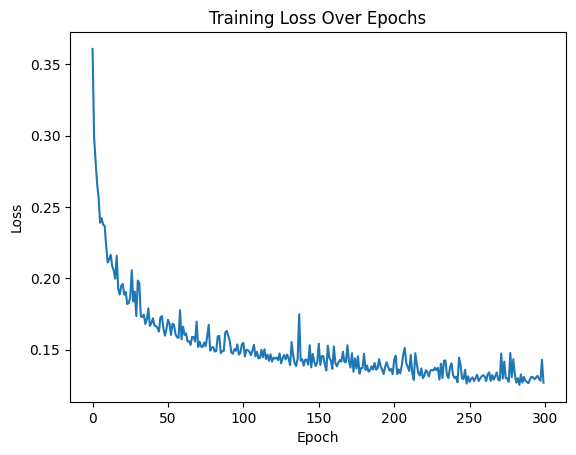

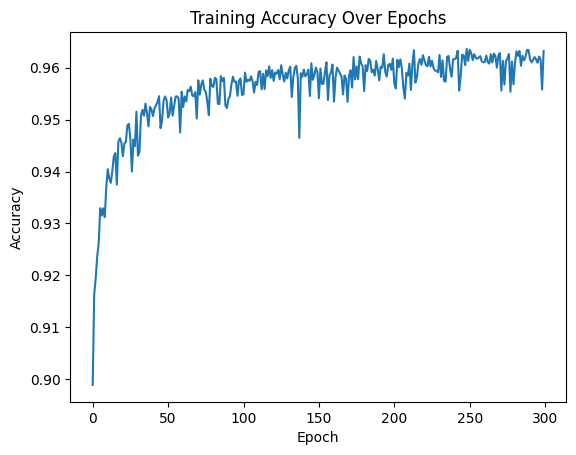


Test Set Accuracy: 93.85%
prediction: [3]
label: 3


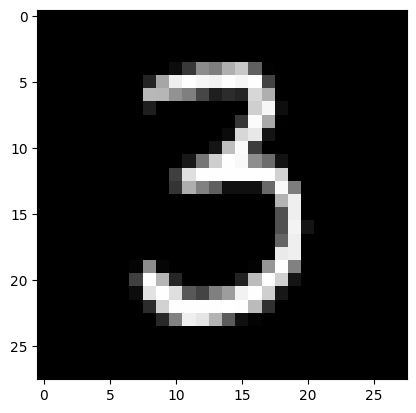

prediction: [0]
label: 0


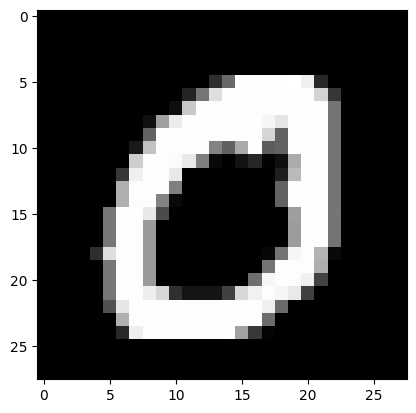

prediction: [7]
label: 7


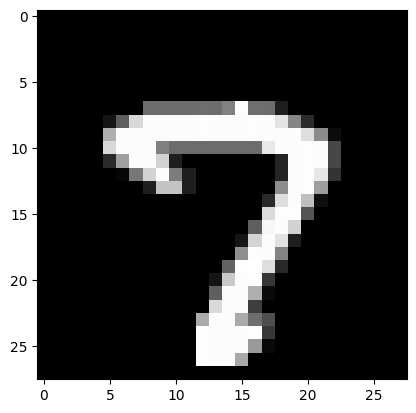

prediction: [4]
label: 4


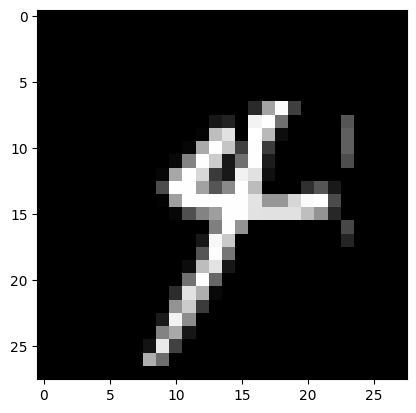

prediction: [9]
label: 9


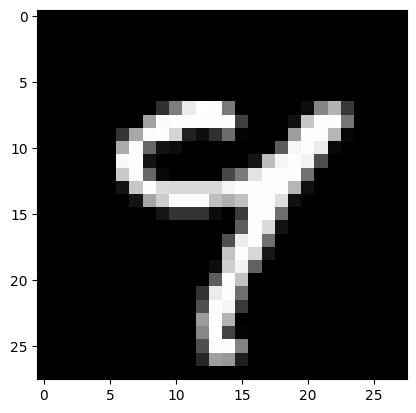

(None, None, None, None, None)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install mlxtend
from mlxtend.data import loadlocal_mnist
# Load MNIST data
train_x, train_y = loadlocal_mnist(
    images_path='/content/train-images.idx3-ubyte',
    labels_path='/content/train-labels.idx1-ubyte'
)
test_x, test_y = loadlocal_mnist(
    images_path='/content/t10k-images.idx3-ubyte',
    labels_path='/content/t10k-labels.idx1-ubyte'
)

# Print original shapes
print("Before preprocessing:")
print("Train X:", train_x.shape)
print("Train Y:", train_y.shape)

# Transpose input data to shape: (features, samples)
train_x = train_x.T  # (784, 60000)
test_x = test_x.T    # (784, 10000)

# Normalize pixel values to [0, 1]
train_x = train_x / 255.0
test_x = test_x / 255.0

# Reshape labels to shape: (1, samples)
train_y = train_y.reshape(1, -1)  # (1, 60000)
test_y = test_y.reshape(1, -1)    # (1, 10000)

# Print shapes after preprocessing
print("\nAfter preprocessing:")
print("Train X:", train_x.shape)
print("Train Y:", train_y.shape)
print("Test X:", test_x.shape)
print("Test Y:", test_y.shape)
def ReLu(z):
    return np.maximum(0,z)
def grad_relu(z):
    return (z > 0).astype(float)

def softmax(z):
    z = z - np.max(z, axis=0, keepdims=True)  # prevent overflow
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def initial_param(z):
    w1 = np.random.randn(10, 784) * np.sqrt(2. / 784)
    w2 = np.random.randn(10, 10) * np.sqrt(2. / 10)

    b1=np.zeros((10,1))
    b2=np.zeros((10,1))
    return w1,b1,w2,b2
def forward_prop(w1,b1,w2,b2,x):
    z1=np.dot(w1,x)+b1
    a1=ReLu(z1)
    z2=np.dot(w2,a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2
#not understood
def one_hot_encode(y, num_classes=10):
    y = y.flatten()
    one_hot = np.zeros((num_classes, y.size))
    one_hot[y, np.arange(y.size)] = 1
    return one_hot


print("one_hot shape:", one_hot_encode(train_y).shape)  # should be (10, m)
def backward_prop(z1, w1, b1, a1, z2, w2, b2, a2, x, y):
    m = x.shape[1]
    one_hot_y = one_hot_encode(y,10)

    dz2 = a2 - one_hot_y
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)

    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * grad_relu(z1)
    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

    return dw1, db1, dw2, db2


def update_param(w1,b1,dw1,db1,w2,b2,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2

def get_predic(a2):
    return np.argmax(a2,0)

def get_accuracy(predic,y):
    return np.sum(predic==y)/y.size

def compute_loss(a2, y):
    m = y.shape[1]
    one_hot_y = one_hot_encode(y,10)
    log_probs = np.log(a2 + 1e-8)
    loss = -np.sum(one_hot_y * log_probs) / m
    return loss

def grad_descent(x, y, alpha, epochs, batch_size=64):
    w1, b1, w2, b2 = initial_param(x)
    losses = []
    accuracies = []
    m = x.shape[1]  # total number of samples

    for epoch in range(epochs):
        # Shuffle data
        permutation = np.random.permutation(m)
        x_shuffled = x[:, permutation]
        y_shuffled = y[:, permutation]

        for i in range(0, m, batch_size):
            # Get mini-batch
            x_batch = x_shuffled[:, i:i + batch_size]
            y_batch = y_shuffled[:, i:i + batch_size]

            # Forward and backward pass
            z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x_batch)
            dw1, db1, dw2, db2 = backward_prop(z1, w1, b1, a1, z2, w2, b2, a2, x_batch, y_batch)
            w1, b1, w2, b2 = update_param(w1, b1, dw1, db1, w2, b2, dw2, db2, alpha)

        # Evaluate after each epoch
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        loss = compute_loss(a2, y)
        acc = get_accuracy(get_predic(a2), y)
        losses.append(loss)
        accuracies.append(acc)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch}")
            print("Accuracy:", acc)
            print("Loss:", loss)

    # Plot loss and accuracy
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.grid(False)
    plt.show()
    plt.plot(accuracies)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy Over Epochs")
    plt.grid(False)
    plt.show()

    return w1, b1, w2, b2


w1, b1, w2, b2 = grad_descent(train_x, train_y, alpha=0.06, epochs=300, batch_size=64)

def evaluate_test_set(test_x, test_y, w1, b1, w2, b2):
    _,_,_,a2 = forward_prop(w1, b1, w2, b2, test_x)
    predictions = get_predic(a2)
    acc = get_accuracy(predictions, test_y)
    print(f"\nTest Set Accuracy: {acc * 100:.2f}%")

evaluate_test_set(test_x, test_y, w1, b1, w2, b2)
def make_prediction(x,w1,b1,w2,b2):
    _,_,_,a2=forward_prop(w1,b1,w2,b2,x)
    y_pred=get_predic(a2)
    return y_pred


def test_prediction(index,w1,b1,w2,b2):
    current_img=train_x[:,index,None]
    prediction=make_prediction(current_img,w1,b1,w2,b2)
    label=train_y[0,index]
    print("prediction:",prediction)
    print("label:",label)

    current_img=current_img.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_img,interpolation='nearest')
    plt.show()

test_prediction(50,w1,b1,w2,b2), test_prediction(51,w1,b1,w2,b2), test_prediction(52,w1,b1,w2,b2), test_prediction(53,w1,b1,w2,b2), test_prediction(54,w1,b1,w2,b2)

In [ ]:
def compute_accuracy(x, y, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predic(a2)
    accuracy = get_accuracy(predictions, y)
    return accuracy

train_acc = compute_accuracy(train_x, train_y, w1, b1, w2, b2)
test_acc = compute_accuracy(test_x, test_y, w1, b1, w2, b2)

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")



Train Accuracy: 96.32%
Test Accuracy: 93.85%


prediction: [3]
label: 3


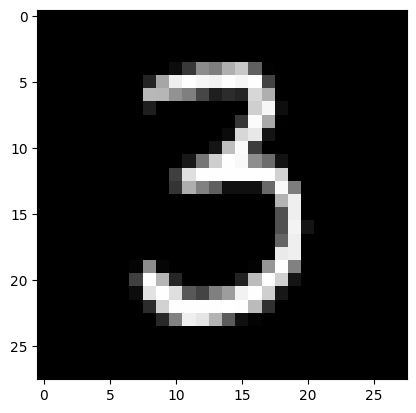

prediction: [0]
label: 0


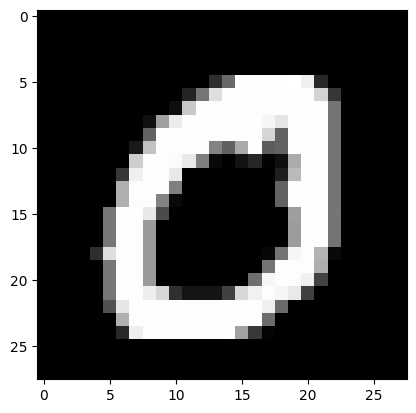

prediction: [7]
label: 7


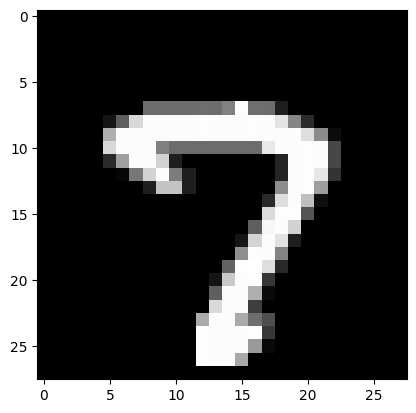

prediction: [4]
label: 4


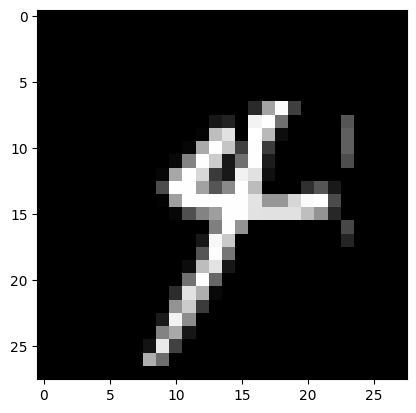

prediction: [9]
label: 9


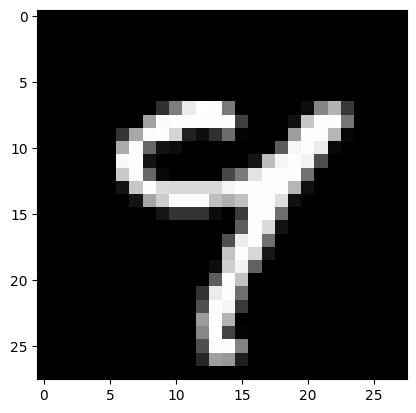

(None, None, None, None, None)

In [ ]:

test_prediction(50,w1,b1,w2,b2), test_prediction(51,w1,b1,w2,b2), test_prediction(52,w1,b1,w2,b2), test_prediction(53,w1,b1,w2,b2), test_prediction(54,w1,b1,w2,b2)